<a href="https://colab.research.google.com/github/klopetx/PHM_tutorial/blob/main/src/01_Raw_singal_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

project_path = 'PHM_tutorial'

if not os.path.isdir(project_path):
  username = 'klopetx'
  repo = project_path

  !git clone https://@github.com/{username}/{repo}

os.chdir(project_path)

!python src/00_Environment_Checks.py

FEMTO dataset is already downloaded.


# Getting familiar with the dataset

FEMTO bearings is a well known dataset used during the IEEE Prognostics and Heath Monitoring context 2012.

Have a look on the documentation and try to answer the following questions.

*   [Paper:](https://hal.science/hal-00719503/document)
*   [Challenge documentation:](https://github.com/wkzs111/phm-ieee-2012-data-challenge-dataset/blob/master/IEEEPHM2012-Challenge-Details.pdf)









## Question time



1)   What sensors where used during the tests?

2)   Which frequencies were used for the acquisition?

3)   Why do you think the frequencies differ?

# Data preparation

From all the data we donwloaded, we will just read and combine some of it so that we can inspect the raw signals.

Just run the following chunks:

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('src')
import raw_signal_auxiliars as RAW_aux


In [3]:
base_dir = 'data/10. FEMTO Bearing'

all_data = RAW_aux.process_acc_files(base_dir, True)

print(all_data.head())

   0     1     2         3   AccX   AccY     bearing  \
0  9  20.0  24.0  212540.0  0.211  0.281  Bearing1_5   
1  9  20.0  24.0  212580.0  0.268 -0.206  Bearing1_5   
2  9  20.0  24.0  212620.0  0.306 -0.444  Bearing1_5   
3  9  20.0  24.0  212660.0  0.226  0.111  Bearing1_5   
4  9  20.0  24.0  212700.0 -0.025  0.077  Bearing1_5   

                                           file_name OP_Condition  \
0  data/10. FEMTO Bearing/Full_Test_Set/Bearing1_...            1   
1  data/10. FEMTO Bearing/Full_Test_Set/Bearing1_...            1   
2  data/10. FEMTO Bearing/Full_Test_Set/Bearing1_...            1   
3  data/10. FEMTO Bearing/Full_Test_Set/Bearing1_...            1   
4  data/10. FEMTO Bearing/Full_Test_Set/Bearing1_...            1   

  OPC_Test_Number  
0               5  
1               5  
2               5  
3               5  
4               5  


In [4]:
all_data.OP_Condition.value_counts()

OP_Condition
1    30720
2    30720
3    10240
Name: count, dtype: int64

# Visualization

Now that he have a single dataframe, we can plot different raw signals.

Remenmber that data are acquired under three operating conditions (rotating speed and load force):

- Condition 1. 1800 rpm and 4000 N: folders Bearing1_x
- Condition 2. 1650 rpm and 4200 N: folders Bearing2_x
- Condition 3. 1500 rpm and 5000 N: folders Bearing3_x

I will show you how to plot some signals one on the top of the other. Look:




## Getting a subset of the data

We will first create a subset of the data. For that:

1) We will display all the unique file_name values that were read.

2) Then, we will take the first and second file.

3) Finally, we we filter the dataset to keep just the file_names we just decided.

In [5]:
unique_files = all_data.file_name.value_counts()
print(unique_files)


file_name
data/10. FEMTO Bearing/Full_Test_Set/Bearing1_5/acc_00001.csv    2560
data/10. FEMTO Bearing/Full_Test_Set/Bearing2_3/acc_00001.csv    2560
data/10. FEMTO Bearing/Learning_set/Bearing1_1/acc_00001.csv     2560
data/10. FEMTO Bearing/Learning_set/Bearing3_1/acc_00001.csv     2560
data/10. FEMTO Bearing/Learning_set/Bearing2_1/acc_00001.csv     2560
data/10. FEMTO Bearing/Learning_set/Bearing3_2/acc_00001.csv     2560
data/10. FEMTO Bearing/Learning_set/Bearing2_2/acc_00001.csv     2560
data/10. FEMTO Bearing/Test_set/Bearing1_6/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing1_3/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing2_4/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing2_6/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing1_4/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing1_7/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing2_7/acc_00001.csv         2560
data/10. F

In [6]:

first_file = unique_files.index[0]
print(first_file)

second_file = unique_files.index[2]
print(second_file)


data/10. FEMTO Bearing/Full_Test_Set/Bearing1_5/acc_00001.csv
data/10. FEMTO Bearing/Learning_set/Bearing1_1/acc_00001.csv


## Plotting the data from different experiments

Now, taking that subset of the data we will just plot it using **matplotlib**, a popular visualization package in python.




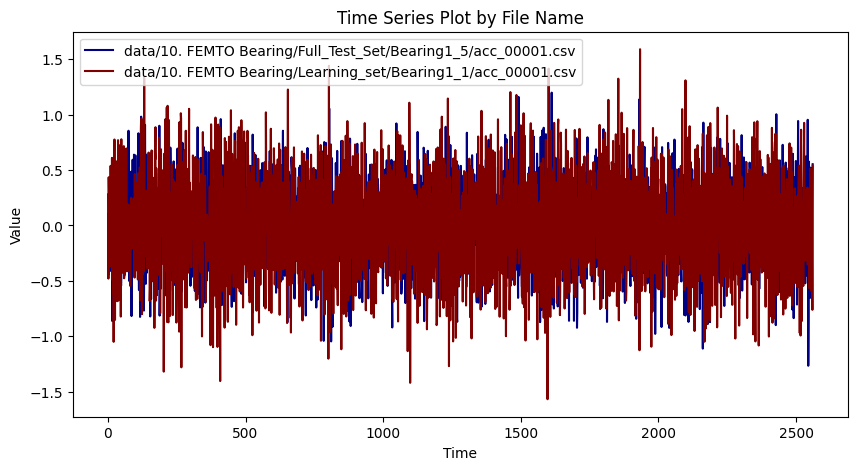

In [7]:
RAW_aux.plot_time_series(all_data,  [first_file, second_file], 5)

### Exercise/Question

You have seen some differences on the previous signals.
Do you think this difference will be bigger when comparing operation 1 against 3?

4) Create a code chunk that visualizes the signals of two different conditions to answer this question.





## Plotting the data from the same experiment over time

Now, instead of comparing single raw files, we will see what happens when through the duration of a single run to failure test. For that, we will read some of the files and combine the data of a single experiment.




In [8]:
path = "/content/PHM_tutorial/data/10. FEMTO Bearing/Learning_set/Bearing1_1"
file_prefix = 'acc_'
one_in = 500  # Change as needed to read every second, third, etc., file

df = RAW_aux.concatenate_files(path, file_prefix, one_in)

Total number of listed files with prefix 'acc_': 2803
Number of files read (based on one_in=500): 6


In [9]:
target_files = df.file_name.value_counts().index

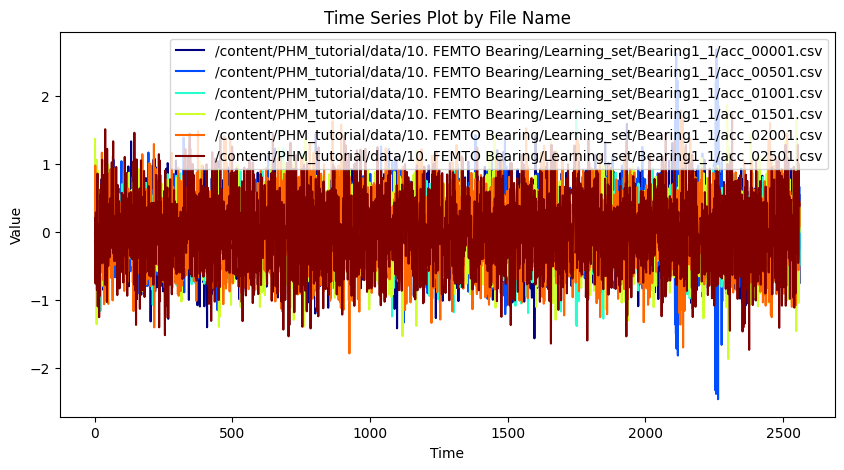

In [10]:
RAW_aux.plot_time_series(df,  target_files, 5)


In addition, we will also plot the evolution of the temperature of this same experiment.

Total number of listed files with prefix 'temp_': 466
Number of files read (based on one_in=75): 7


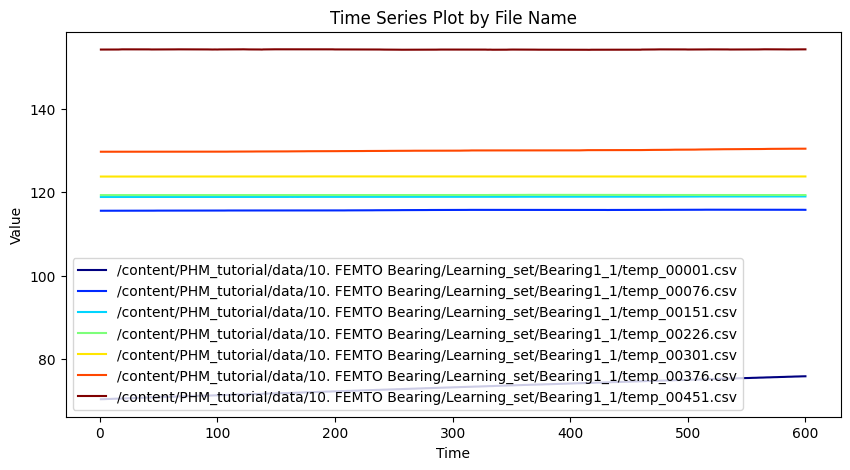

In [11]:

path = "/content/PHM_tutorial/data/10. FEMTO Bearing/Learning_set/Bearing1_1"
file_prefix = 'temp_'
one_in = 75  # Change as needed to read every second, third, etc., file

df = RAW_aux.concatenate_files(path, file_prefix, one_in)

target_files = df.file_name.value_counts().index

RAW_aux.plot_time_series(df,  target_files, 4)



### Question time

5) Do you see any clear pattern of degradation?

6) How would you sinthesise the information of a raw signal?



# Before submitting the notebook

 - Remembenber to re-start the session and run all the code to ensure there are no errors.